In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [36]:
# qiyu: the acuracy is 1 for all models?!!!!!!!!!

In [37]:
# global imports and global vars
import pandas as pd
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

performanceList = [0] *  5
time_to_train = [0] * 5
time_to_predict = [0] * 5

In [38]:
# Step1: read the files 
data = pd.read_csv("data/iris-flower-dataset/IRIS.csv")

data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
# Step2: preprocessing the data
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data["species"] = le.fit_transform(data["species"])

X = data[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = data["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [40]:
from sklearn import tree
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plot

# Step3: Models

# helper functions
def plotFigure_plot(title, xLabel, xRange, yLabel, xTicks, saveAsName):
    plot.figure()
    plot.plot(xRange, np.mean(train_scores, axis=1), label = "Train Score")
    plot.plot(xRange, np.mean(test_scores, axis=1), label = "CV Score") 
    plot.legend()
    plot.title(title)
    plot.xlabel(xLabel)
    plot.ylabel(yLabel)
    plot.xticks(xTicks)
    plot.grid()
    plot.savefig(saveAsName)
    plot.show()
    
def plotFigure_semilogx(title, xLabel, xRange, yLabel, xTicks, saveAsName):
    plot.figure()
    plot.semilogx(xRange, np.mean(train_scores, axis=1), label = "Train Score")
    plot.semilogx(xRange, np.mean(test_scores, axis=1), label = "CV Score") 
    plot.legend()
    plot.title(title)
    plot.xlabel(xLabel)
    plot.ylabel(yLabel)
    # plot.xticks(xTicks)
    plot.grid()
    plot.savefig(saveAsName)
    plot.show()

In [41]:
# Step3.a: Decision Tree
decisionTreeClassifier_inital = tree.DecisionTreeClassifier()

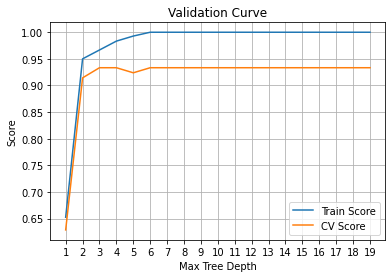

In [42]:
# Step 3.a: Decision Tree - Tree depth
# param_range np.arange(1,20), has tried several diff options, this is good enough to show the "trend"
train_scores, test_scores = validation_curve(decisionTreeClassifier_inital, X_train, y_train, param_name='max_depth', param_range = np.arange(1,20))
    
plotFigure_plot("Validation Curve", "Max Tree Depth", np.arange(1,20), "Score", np.arange(1,20), "iris_decisionTree_validationCurve_maxDepth.png")

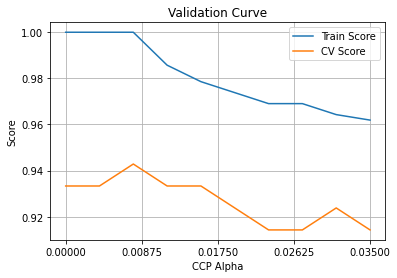

In [43]:
# Step 3.a: Decision Tree - Pruning
# param_range np.linspace(0,0.035,10), the most used? one from what I can found in Internet
train_scores, test_scores = validation_curve(decisionTreeClassifier_inital, X_train, y_train, param_name='ccp_alpha', param_range = np.linspace(0,0.035,10))

plotFigure_plot("Validation Curve", "CCP Alpha", np.linspace(0,0.035,10), "Score", np.linspace(0,0.035,5), "iris_decisionTree_validationCurve_Pruning.png")

In [44]:
# Step 3.a: Decision Tree - Try to optimize the two hyper-parameters & performance
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(1,20), 'ccp_alpha': np.linspace(0,0.035,10)}
decisionTreeClassifier_optimal = GridSearchCV(decisionTreeClassifier_inital, param_grid)

startTime1 = time.time()
decisionTreeClassifier_optimal.fit(X_train, y_train)
time_to_train[0] = time.time() - startTime1

print("Optimal hyper-parameters:",decisionTreeClassifier_optimal.best_params_)
print("time_to_train for decision tree:", time_to_train[0])

startTime2 = time.time()
performanceList[0] = accuracy_score(y_test, decisionTreeClassifier_optimal.predict(X_test))
time_to_predict[0] = time.time() - startTime2

print("Performance for the optimal decision tree model:", performanceList[0])
print("time_to_predict for decision tree:", time_to_predict[0])

Optimal hyper-parameters: {'ccp_alpha': 0.0, 'max_depth': 8}
time_to_train for decision tree: 4.312134742736816
Performance for the optimal decision tree model: 1.0
time_to_predict for decision tree: 0.0020797252655029297


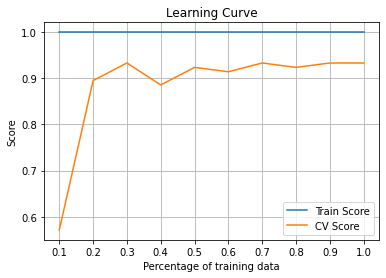

In [45]:
# Step 3.a: Decision Tree - learning curve
from sklearn.model_selection import learning_curve

decisionTreeClassifier_final = tree.DecisionTreeClassifier(
    max_depth = decisionTreeClassifier_optimal.best_params_['max_depth'], 
    ccp_alpha = decisionTreeClassifier_optimal.best_params_['ccp_alpha'])

train_sizes_abs, train_scores, test_scores = learning_curve(
    decisionTreeClassifier_final, 
    X_train, 
    y_train, 
    train_sizes = np.linspace(0.1,1.0,10))

plotFigure_plot("Learning Curve", "Percentage of training data", np.linspace(0.1,1.0,10), "Score", np.linspace(0.1,1.0,10), "iris_decisionTree_learningCurve.png")

In [46]:
# Step 3.b: Neural Networks
from sklearn.neural_network import MLPClassifier

# bc ConvergenceWarning, set max_iter to something larger
MLPClassifier_initial = MLPClassifier(max_iter = 5000)

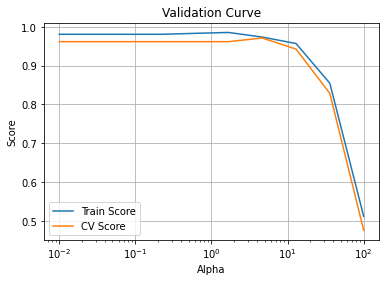

In [47]:
# Step 3.b: Neural Networks - Alpha (Penalty term for L2 regularization term)
# param_range, start with np.logspace(-1, 1, 5), the one in the example code, til found the one that show the "trend"
train_scores, test_scores = validation_curve(MLPClassifier_initial, X_train, y_train, param_name = 'alpha', param_range = np.logspace(-2, 2, 10))

plotFigure_semilogx("Validation Curve", "Alpha", np.logspace(-2, 2, 10), "Score", np.logspace(-2, 2, 10), "iris_neuralNetworks_validationCurve_Alpha.png")

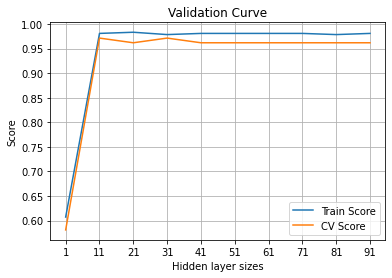

In [48]:
# Step 3.b: Neural Networks - Hidden layer sizes
train_scores, test_scores = validation_curve(MLPClassifier_initial, X_train, y_train, param_name = 'hidden_layer_sizes', param_range = np.arange(1,100, 10))

plotFigure_plot("Validation Curve", "Hidden layer sizes", np.arange(1,100, 10), "Score", np.arange(1,100, 10), "iris_neuralNetworks_validationCurve_HiddenLayerSizes.png")

In [49]:
# Step 3.b: Neural Networks - Try to optimize the two hyper-parameters

param_grid = {'alpha': np.logspace(-2, 2, 10), 'hidden_layer_sizes': np.arange(1,100, 10)}
MLPClassifier_optimal = GridSearchCV(MLPClassifier_initial, param_grid)

startTime1 = time.time()
MLPClassifier_optimal.fit(X_train, y_train)
time_to_train[1] = time.time() - startTime1

print("Optimal hyper-parameters:",MLPClassifier_optimal.best_params_)
print("time_to_train for neural networks:", time_to_train[1])

startTime2 = time.time()
performanceList[1] = accuracy_score(y_test, MLPClassifier_optimal.predict(X_test))
time_to_predict[1] = time.time() - startTime2

print("Performance for the optimal neural networks model:", performanceList[1])
print("time_to_predict for neural networks:", time_to_predict[1])

Optimal hyper-parameters: {'alpha': 0.01, 'hidden_layer_sizes': 31}
time_to_train for neural networks: 233.21271538734436
Performance for the optimal neural networks model: 1.0
time_to_predict for neural networks: 0.0021753311157226562


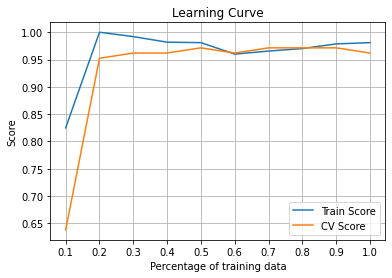

In [50]:
# Step 3.b: Neural Networks - learning curve 

MLPClassifier_final = MLPClassifier(
    alpha = MLPClassifier_optimal.best_params_['alpha'], 
    hidden_layer_sizes = MLPClassifier_optimal.best_params_['hidden_layer_sizes'],
    max_iter = 3000)

train_sizes_abs, train_scores, test_scores = learning_curve(
    MLPClassifier_final, 
    X_train, 
    y_train, 
    train_sizes = np.linspace(0.1,1.0,10))

plotFigure_plot("Learning Curve", "Percentage of training data", np.linspace(0.1,1.0,10), "Score", np.linspace(0.1,1.0,10), "iris_neuralNetworks_learningCurve.png")

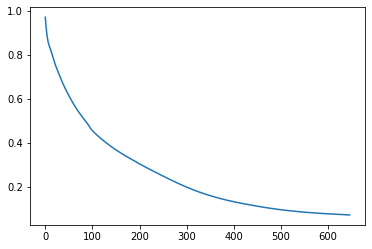

In [51]:
# Step 3.b: Neural Networks - loss curve 
MLPClassifier_final.fit(X, y)
loss_values = MLPClassifier_final.loss_curve_

plot.plot(loss_values)
plot.savefig("titanic_neuralNetworks_lossCurve.png")
plot.show()

In [52]:
# Step 3.c: ADABoosting
from sklearn.ensemble import AdaBoostClassifier

adaBoostClassifier = AdaBoostClassifier()

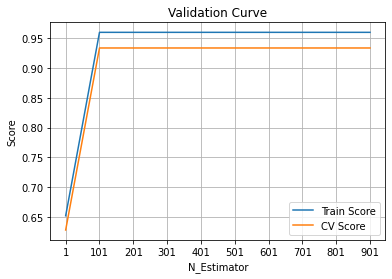

In [53]:
# Step 3.c: ADABoosting - n_estimators, number of weak learners
# param_range start with np.arange(1,100, 10), has tried several diff options, this is good enough to show the "trend"
train_scores, test_scores = validation_curve(adaBoostClassifier, X_train, y_train, param_name='n_estimators', param_range = np.arange(1,1000, 100))
    
plotFigure_plot("Validation Curve", "N_Estimator", np.arange(1,1000, 100), "Score", np.arange(1,1000, 100), "iris_boosting_validationCurve_nEstimator.png")

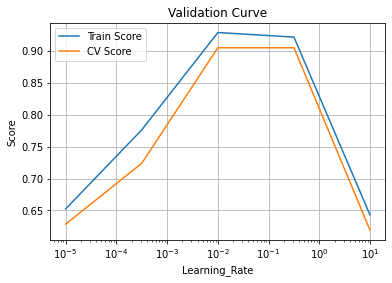

In [54]:
# Step 3.c: ADABoosting - learning_rate, to shrink the contribution of each sub-classifier
train_scores, test_scores = validation_curve(adaBoostClassifier, X_train, y_train, param_name='learning_rate', param_range = np.logspace(-5,1,5))
    
plotFigure_semilogx("Validation Curve", "Learning_Rate", np.logspace(-5,1,5), "Score", np.logspace(-5,1,5), "iris_boosting_validationCurve_learningRate.png")

In [55]:
# Step 3.c: ADABoosting - Try to optimize the two hyper-parameters

param_grid = {'n_estimators': np.arange(1,1000, 100), 'learning_rate': np.logspace(-5,1,5)}
optimalAdaBoostClassifier = GridSearchCV(adaBoostClassifier, param_grid)

startTime1 = time.time()
optimalAdaBoostClassifier.fit(X_train, y_train)
time_to_train[2] = time.time() - startTime1

print("Optimal hyper-parameters:",optimalAdaBoostClassifier.best_params_)
print("time_to_train for adaBoosting:", time_to_train[2])

startTime2 = time.time()
performanceList[2] = accuracy_score(y_test, optimalAdaBoostClassifier.predict(X_test))
time_to_predict[2] = time.time() - startTime2

print("Performance for the ada boosting model:", performanceList[2])
print("time_to_predict for adaBoosting:", time_to_predict[2])

Optimal hyper-parameters: {'learning_rate': 0.00031622776601683794, 'n_estimators': 601}
time_to_train for adaBoosting: 169.06323075294495
Performance for the ada boosting model: 1.0
time_to_predict for adaBoosting: 0.09939384460449219


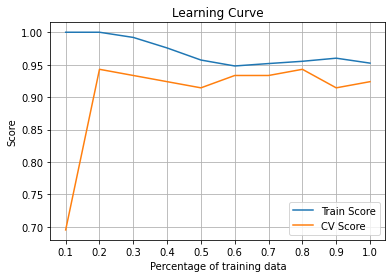

In [56]:
# Step 3.c: ADABoosting - learning curve 

AdaBoostClassifier_final = AdaBoostClassifier(
    n_estimators = optimalAdaBoostClassifier.best_params_['n_estimators'], 
    learning_rate = optimalAdaBoostClassifier.best_params_['learning_rate'])

train_sizes_abs, train_scores, test_scores = learning_curve(
    AdaBoostClassifier_final, 
    X_train, 
    y_train, 
    train_sizes = np.linspace(0.1,1.0,10))

# qiyu?????: how to intepret the learning curve
plotFigure_plot("Learning Curve", "Percentage of training data", np.linspace(0.1,1.0,10), "Score", np.linspace(0.1,1.0,10), "iris_adaBoosting_learningCurve.png")

In [57]:
# Step 3.d: SVM TODO
from sklearn import svm

SVMClassifier_initial = svm.SVC()
def plotFigure_label(title, xLabel, xRange, yLabel, xTicks, saveAsName):
    plot.figure()
    xRange = xRange
    plot.plot(xRange, np.mean(train_scores, axis=1), label = "Train Score")
    plot.plot(xRange, np.mean(test_scores, axis=1), label = "CV Score") 
    plot.legend()
    plot.title(title)
    plot.xlabel(xLabel)
    plot.ylabel(yLabel)
    plot.xticks(xRange, xTicks)
    plot.grid()
    plot.savefig(saveAsName)
    plot.show()

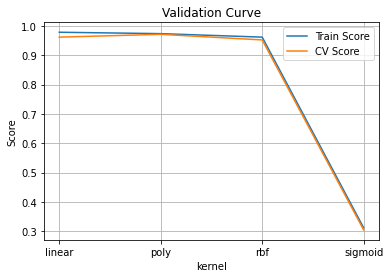

In [58]:
# Step 3.d: SVM - kernel 
train_scores, test_scores = validation_curve(SVMClassifier_initial, X_train, y_train, param_name='kernel', param_range = {"linear", "poly", "rbf", "sigmoid"})
plotFigure_label("Validation Curve", "kernel", [1, 2, 3, 4], "Score", ["linear", "poly", "rbf", "sigmoid"], "iris_SVM_validationCurve_kernel.png")

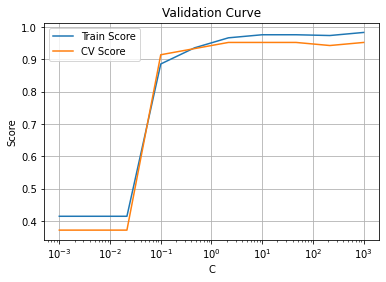

In [59]:
# Step 3.d: SVM - C, the strength of regulation

# have tried, degree, no convergence

train_scores, test_scores = validation_curve(SVMClassifier_initial, X_train, y_train, param_name = "C", param_range = np.logspace(-3,3,10))

plotFigure_semilogx("Validation Curve", "C", np.logspace(-3,3,10), "Score", np.logspace(-3,3,10), "iris_SVM_validationCurve_c.png")

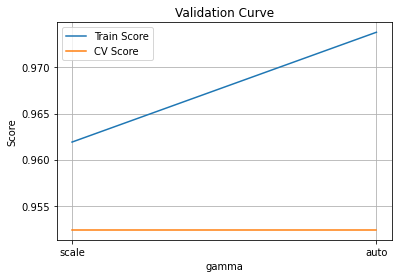

In [60]:
# Step 3.d: SVM - gamma, Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
# If you’re looking at C, you’ll likely want to consider gamma as well

train_scores, test_scores = validation_curve(SVMClassifier_initial, X_train, y_train, param_name = "gamma", param_range = {"scale", "auto"})

plotFigure_label("Validation Curve", "gamma", [1, 2], "Score", ["scale", "auto"], "iris_SVM_validationCurve_gamma.png")

In [61]:
# Step 3.d: SVM - Try to optimize the three hyper-parameters

param_grid = {'kernel': ["linear", "poly", "rbf", "sigmoid"], 'C': np.logspace(-3,3,10), 'gamma': ["scale", "auto"]}
SVMBoostClassifier_optimal = GridSearchCV(SVMClassifier_initial, param_grid)

startTime1 = time.time()
SVMBoostClassifier_optimal.fit(X_train, y_train)
time_to_train[2] = time.time() - startTime1

print("Optimal hyper-parameters:",SVMBoostClassifier_optimal.best_params_)
print("time_to_train for SVM:", time_to_train[2])

startTime2 = time.time()
performanceList[2] = accuracy_score(y_test, SVMBoostClassifier_optimal.predict(X_test))
time_to_predict[2] = time.time() - startTime2

print("Performance for the SVM model:", performanceList[2])
print("time_to_predict for SVM:", time_to_predict[2])

Optimal hyper-parameters: {'C': 2.154434690031882, 'gamma': 'scale', 'kernel': 'linear'}
time_to_train for SVM: 2.729865550994873
Performance for the SVM model: 1.0
time_to_predict for SVM: 0.0022563934326171875


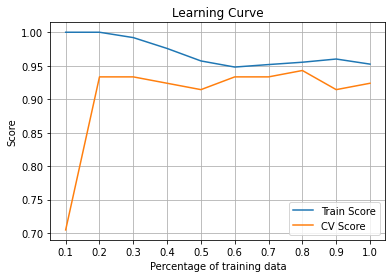

In [62]:
# Step 3.d: SVM - learning curve 

SVMClassifier_final = svm.SVC(
    C = SVMBoostClassifier_optimal.best_params_['C'], 
    gamma = SVMBoostClassifier_optimal.best_params_['gamma'],
    kernel = SVMBoostClassifier_optimal.best_params_['kernel'])

train_sizes_abs, train_scores, test_scores = learning_curve(
    AdaBoostClassifier_final, 
    X_train, 
    y_train, 
    train_sizes = np.linspace(0.1,1.0,10))

plotFigure_plot("Learning Curve", "Percentage of training data", np.linspace(0.1,1.0,10), "Score", np.linspace(0.1,1.0,10), "iris_SVM_learningCurve.png")

In [63]:
# Step 3.e: k-nearest neighbors 

from sklearn.neighbors import KNeighborsClassifier

KNNClassifier_inital = KNeighborsClassifier()

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 729, in kneighbors
    " but n_samples = %d, n_neighbors = %d

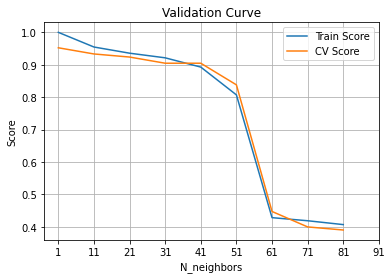

In [64]:
# Step 3.e: k-nearest neighbors  - n_neighbors
train_scores, test_scores = validation_curve(KNNClassifier_inital, X_train, y_train, param_name='n_neighbors', param_range = np.arange(1,100, 10))
    
plotFigure_plot("Validation Curve", "N_neighbors", np.arange(1,100, 10), "Score", np.arange(1,100, 10), "iris_KNN_validationCurve_nNeighbors.png")

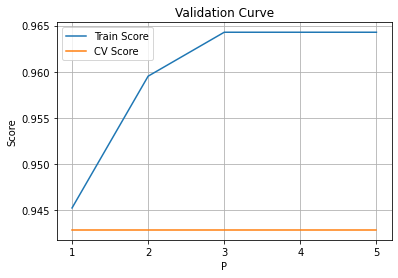

In [65]:
# Step 3.e: k-nearest neighbors  - p (Power parameter for the Minkowski metric)
# switch from weights to p
train_scores, test_scores = validation_curve(KNNClassifier_inital, X_train, y_train, param_name='p', param_range = np.arange(1,6))

plotFigure_plot("Validation Curve", "P", np.arange(1,6), "Score", np.arange(1,6), "iris_KNN_validationCurve_p.png")

In [66]:
# Step 3.e: k-nearest neighbors - Try to optimize the two hyper-parameters

param_grid = {'n_neighbors': np.arange(1,100, 10), 'p': np.arange(1,6)}
KNNClassifier_optimal = GridSearchCV(KNNClassifier_inital, param_grid)

startTime1 = time.time()
KNNClassifier_optimal.fit(X_train, y_train)
time_to_train[4] = time.time() - startTime1

print("Optimal hyper-parameters:",KNNClassifier_optimal.best_params_)
print("time_to_train for K-NN:", time_to_train[4])

startTime2 = time.time()
performanceList[4] = accuracy_score(y_test, KNNClassifier_optimal.predict(X_test))
time_to_predict[4] = time.time() - startTime2

print("Performance for the K-NN model:", performanceList[4])
print("time_to_predict for K-NN tree:", time_to_predict[4])

Optimal hyper-parameters: {'n_neighbors': 1, 'p': 2}
time_to_train for K-NN: 1.3476743698120117
Performance for the K-NN model: 1.0
time_to_predict for K-NN tree: 0.003974199295043945


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 729, in kneighbors
    " but n_samples = %d, n_neighbors = %d

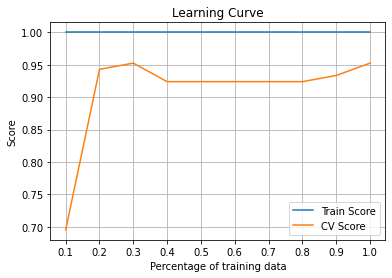

In [67]:
# Step 3.e: k-nearest neighbors - learning curve 

KNNClassifier_final = KNeighborsClassifier(
    n_neighbors = KNNClassifier_optimal.best_params_['n_neighbors'], 
    p = KNNClassifier_optimal.best_params_['p'])

train_sizes_abs, train_scores, test_scores = learning_curve(
    KNNClassifier_final, 
    X_train, 
    y_train, 
    train_sizes = np.linspace(0.1,1.0,10))

plotFigure_plot("Learning Curve", "Percentage of training data", np.linspace(0.1,1.0,10), "Score", np.linspace(0.1,1.0,10), "iris_KNN_learningCurve.png")